In [90]:
import requests
import json
import csv
import pandas as pd
import base64
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
from wordcloud import WordCloud

In [13]:
data = pd.read_csv('./Search-Sample-Tweets-Trackmyhashtag/sample.csv')

In [14]:
data.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,...,Name,Username,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,Impressions
0,"""1167429261210218497""",https://twitter.com/animalhealthEU/status/1167...,30 Aug 2019 13:30:00,Pets change our lives &amp; become a part of o...,Tweet,Twitter Ads Composer,0,4,Brussels,English,...,AnimalhealthEurope,animalhealthEU,AnimalhealthEurope represents manufacturers of...,Non-Verified,https://twitter.com/animalhealthEU,Non-Protected,3697,542,17 Dec 2012 09:14:15,7394
1,"""1167375334670557185""",https://twitter.com/PennyBrohnUK/status/116737...,30 Aug 2019 09:55:43,Another spot of our #morethanmedicine bus in #...,Tweet,Twitter Web App,0,5,"Pill, Bristol",English,...,Penny Brohn UK,PennyBrohnUK,We help people live well with the impact of ca...,Non-Verified,https://twitter.com/PennyBrohnUK,Non-Protected,3227,1571,15 Sep 2010 09:44:02,6454
2,"""1167237977615097861""",https://twitter.com/lordbyronaf/status/1167237...,30 Aug 2019 00:49:54,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...,ReTweet,Twitter for Android,0,0,"Ohio, USA",English,...,Lord ByronAF,lordbyronaf,"It's easier to be who you are, than it is to b...",Non-Verified,https://twitter.com/lordbyronaf,Non-Protected,7808,8617,25 Jul 2012 15:43:47,0
3,"""1167236897078480898""",https://twitter.com/CountessDavis/status/11672...,30 Aug 2019 00:45:37,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...,ReTweet,Twitter for Android,0,0,NaN,English,...,Lisa Countess davis,CountessDavis,I am named after @ElvisPresley daughter Lisa M...,Non-Verified,https://twitter.com/CountessDavis,Non-Protected,291,81,26 Jan 2017 18:21:42,0
4,"""1167228378191204353""",https://twitter.com/Local12/status/11672283781...,30 Aug 2019 00:11:46,What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...,ReTweet,TweetDeck,0,0,"Cincinnati, OH",English,...,Local 12/WKRC-TV,Local12,Local 12 is #Cincinnati's trusted source for b...,Verified,https://twitter.com/Local12,Non-Protected,198675,651,02 Sep 2008 20:09:44,0


In [15]:
print(len(data))

386


In [16]:
data.columns

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time (UTC)', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Tweet Language', 'User Id', 'Name', 'Username',
       'User Bio', 'Verified or Non-Verified', 'Profile URL',
       'Protected or Non-protected', 'User Followers', 'User Following',
       'User Account Creation Date', 'Impressions'],
      dtype='object')

In [21]:
data.shape

(386, 21)

In [23]:
data.isnull().sum().sort_values(ascending = False)

Tweet Location                61
User Bio                      19
Tweet Language                 1
Impressions                    0
Tweet URL                      0
Tweet Posted Time (UTC)        0
Tweet Content                  0
Tweet Type                     0
Client                         0
Retweets Received              0
Likes Received                 0
User Id                        0
User Account Creation Date     0
Name                           0
Username                       0
Verified or Non-Verified       0
Profile URL                    0
Protected or Non-protected     0
User Followers                 0
User Following                 0
Tweet Id                       0
dtype: int64

In [25]:
data.dropna(subset = ['Tweet Location'], inplace = True)

In [28]:
print(data.dtypes)

Tweet Id                      object
Tweet URL                     object
Tweet Posted Time (UTC)       object
Tweet Content                 object
Tweet Type                    object
Client                        object
Retweets Received              int64
Likes Received                 int64
Tweet Location                object
Tweet Language                object
User Id                       object
Name                          object
Username                      object
User Bio                      object
Verified or Non-Verified      object
Profile URL                   object
Protected or Non-protected    object
User Followers                 int64
User Following                 int64
User Account Creation Date    object
Impressions                    int64
dtype: object


In [30]:
data['Tweet Posted Time (UTC)'] = pd.to_datetime(data['Tweet Posted Time (UTC)'])

In [32]:
print(data.dtypes)

Tweet Id                              object
Tweet URL                             object
Tweet Posted Time (UTC)       datetime64[ns]
Tweet Content                         object
Tweet Type                            object
Client                                object
Retweets Received                      int64
Likes Received                         int64
Tweet Location                        object
Tweet Language                        object
User Id                               object
Name                                  object
Username                              object
User Bio                              object
Verified or Non-Verified              object
Profile URL                           object
Protected or Non-protected            object
User Followers                         int64
User Following                         int64
User Account Creation Date            object
Impressions                            int64
dtype: object


In [38]:
start_date_tweet = data['Tweet Posted Time (UTC)'].min()
end_date_tweet = data['Tweet Posted Time (UTC)'].max()

print(start_date_tweet , "and" ,end_date_tweet)

2019-07-01 08:24:32 and 2019-08-30 13:30:00


In [40]:
data['Tweet Posted Time (UTC)_date'] = pd.to_datetime(data['Tweet Posted Time (UTC)'].dt.date)

In [41]:
#no.of times a tweet appears on a particular day

In [46]:
tweet_trend = pd.DataFrame(data['Tweet Posted Time (UTC)_date'].value_counts())

tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True) #sorted according to the dates

In [47]:
tweet_trend.head()

,tweet_count
2019-07-01,14
2019-07-02,8
2019-07-03,5
2019-07-04,8
2019-07-05,11


Text(0, 0.5, 'Tweet Count')

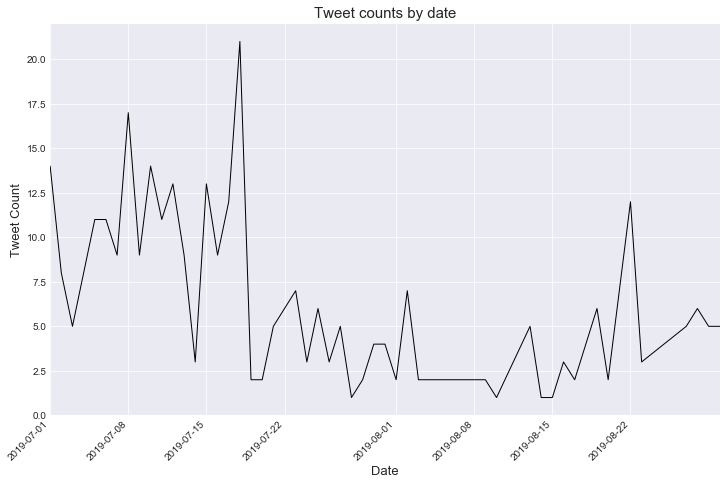

In [51]:
#line plot using seaborn
# the 'rot' argument control x-axis ticks rotation
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'k',
                               linewidth = 1)
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

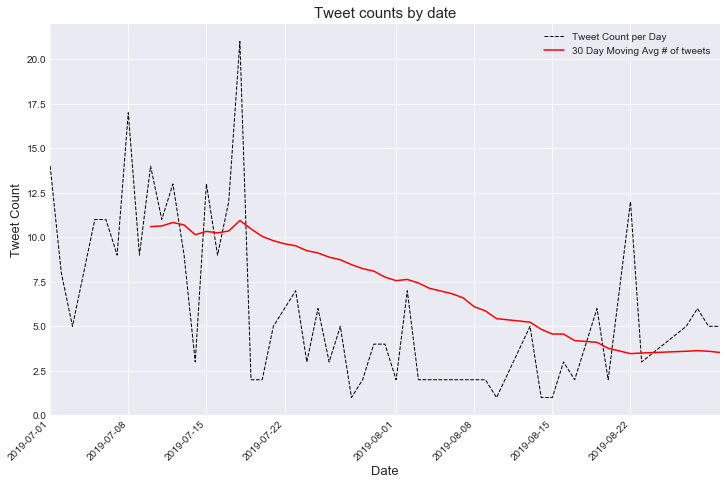

In [54]:
#a 30 day average of the tweets(monthly average of tweeets .
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "--", 
                                figsize = (12,8), rot = 45, 
                                color = 'k',
                                label = 'Tweet Count per Day',
                               linewidth = 1)


plt.plot(tweet_trend['tweet_count'].rolling(window = 30, min_periods = 10).mean(), 
         color = 'r', 
         label = '30 Day Moving Avg # of tweets')
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)
plt.legend(loc = 'best')


<h1>Text Analytics</h1>

In [57]:
data['Tweet Content'].head(40)

0     Pets change our lives &amp; become a part of o...
1     Another spot of our #morethanmedicine bus in #...
2     What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...
4     What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...
5     What a great team ⁦@HealthSourceOH⁩ ⁦@Local12⁩...
6     Will you be at #FIX19? Want a preview of @AG_E...
8     Will you be at #FIX19? Want a preview of @AG_E...
10    Will you be at #FIX19? Want a preview of @AG_E...
11    Will you be at #FIX19? Want a preview of @AG_E...
12    Y’all ⁦@UMNNMFamMedRes⁩ Rose Marie Leslie is a...
13    @Medtronic Here, here! Engage with your patien...
14    @Medtronic Here, here! Engage with your patien...
15    Zoonosen sind ein Risiko für Mensch und Tier❗️...
16    Zoonosen sind ein Risiko für Mensch und Tier❗️...
17    Zoonosen sind ein Risiko für Mensch und Tier❗️...
18    Czy wiesz, że do bez leków dla zwierząt potrze...
19    Thank you @crtaylor33 and @forbes for spotligh...
20    Thank you @crtaylor33 and @forbes for spot

In [73]:
#removing hashtags
def remove_hashtag(tweet):
    hashtags_only = []
    if(len(re.findall("(#[^#\s]+)", tweet))) > 0:
       tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

hashtags_only = data['Tweet Content'].map(remove_hashtag)
        

In [74]:
#removing extraneous 
def remove_extraneous(tweet):
    '''Given a text, remove unnecessary characters from the beginning and the end'''
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

text_clean = hashtags_only.map(remove_extraneous)

In [75]:
#checks for links and removes them 
def remove_links(tweet):
    '''Provide a tweet and remove the links from it'''
    text_only = []
    if len(re.findall("(https://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(https://[^\s]+)", "", tweet)
    if len(re.findall("(http://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(http://[^\s]+)", "", tweet)    
    text_only.append(tweet)
    return text_only[0]

text_no_links = text_clean.map(remove_links)

In [80]:
#removing mentions
def remove_mentions(tweet):
    '''Given a text, remove the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

text_clean_final = text_no_links.map(remove_mentions)


In [81]:
#extracting user-mentions
# in case no mention present, we return "0"
def extract_mentions(tweet):
    '''Given a tweet, this function returns the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        mentions.append(re.findall('@([^\s@]+)', tweet))
    else:
        mentions.append(["0"])
    return mentions[0]

# Put the user mentions in a new column in our dataframe
data['user_mentions'] = text_clean.map(extract_mentions)

In [82]:
data['tweet_text_only'] = text_clean_final 

In [83]:
data['tweet_text_only'].head()

0    Pets change our lives &amp; become a part of o...
1    Another spot of our  bus in  this week! If you...
2                              What a great team ⁦ ⁦  
4                              What a great team ⁦ ⁦  
5                              What a great team ⁦ ⁦  
Name: tweet_text_only, dtype: object

In [84]:
#where are hastags moslty used for
def extract_hashtags(tweet):
    '''Provide a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

data['tweet_hashtags'] = data['Tweet Content'].map(extract_hashtags)
data['tweet_hashtags'].head()

0        [#MorethanMedicine, #PetCare, #PetsareFamily]
1    [#morethanmedicine, #bristol, #livingwellwithc...
2                                  [#morethanmedicine]
4                                  [#morethanmedicine]
5                                  [#morethanmedicine]
Name: tweet_hashtags, dtype: object

In [85]:
#next lets see which hashtags are seen the most
all_hashtags = data['tweet_hashtags'].tolist()

new_hashtags = []
for i in all_hashtags:
    for j in i:
        new_hashtags.append(j)
        

In [106]:
new_hashtags_series = pd.Series(new_hashtags)
hashtag_counts = new_hashtags_series.value_counts()
hashtag_counts.head()

#MorethanMedicine    143
#MoreThanMedicine     87
#morethanmedicine     78
#animalhealth         42
#TipsForNewDocs       36
dtype: int64

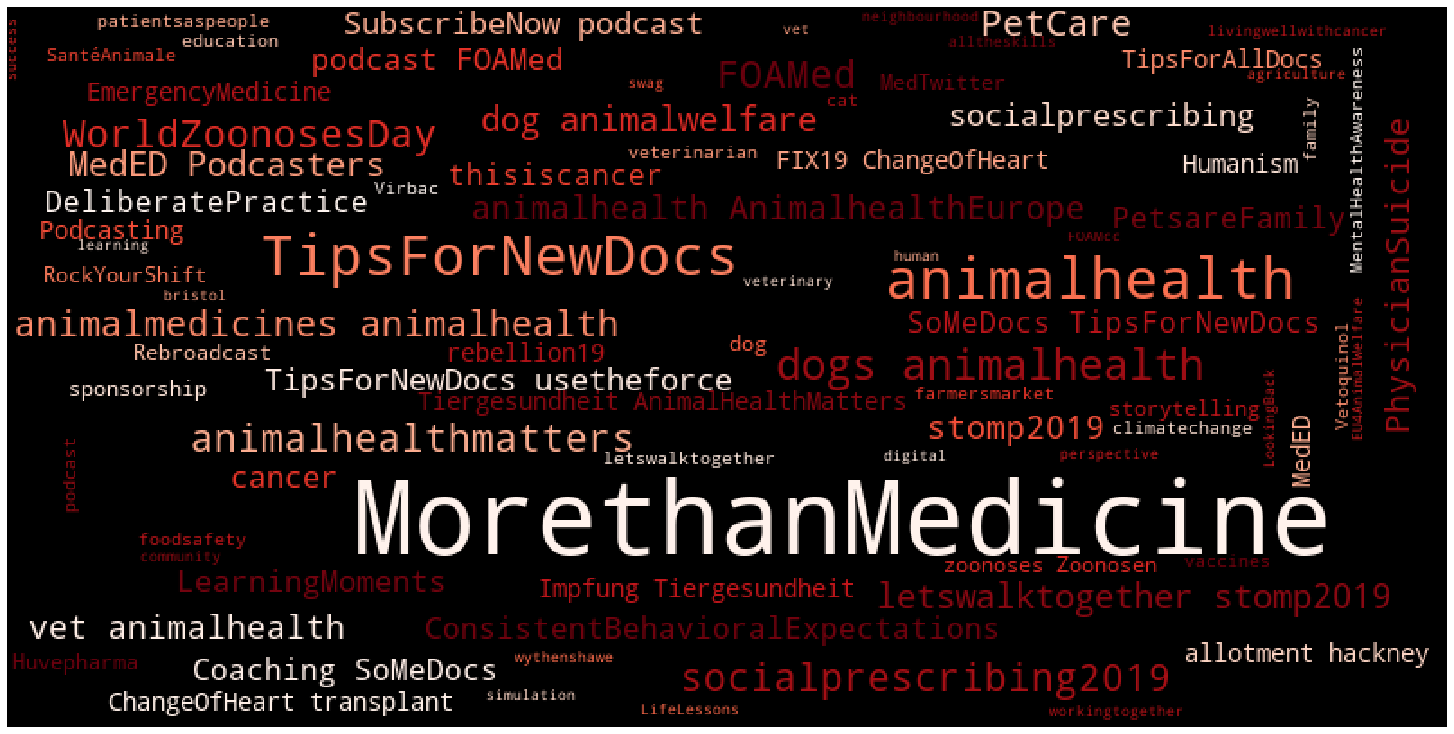

In [104]:
#takes values from series and convert it into list
hashes = new_hashtags_series.values
hashes = hashes.tolist()

hash_words = " ".join(hashes)
wordcloud = WordCloud(width= 800, height = 400, 
                      relative_scaling=0.5,
                      colormap = "Reds",
                     max_words = 100).generate(hash_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [96]:
hash_words = " ".join(hashes)

In [97]:
len(hash_words)

12028

Text(0, 0.5, 'hashtags')

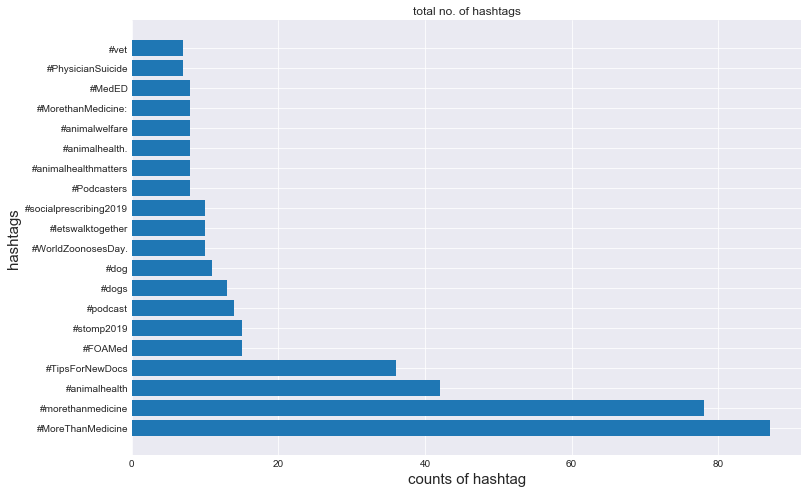

In [111]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values , width = hashtag_counts[1:21])
plt.title("total no. of hashtags")
plt.xlabel("counts of hashtag" , fontsize = 15)
plt.ylabel("hashtags" , fontsize = 15)

In [135]:
#Let's first extract the dates and the hashtags used on those dates. We would then count each top hashtag in these and proceed
hashtag_date_df = data[['Tweet Posted Time (UTC)_date' , 'tweet_hashtags']]
hashtag_date_df = hashtag_date_df.reset_index(drop = True)

all_hashtags = hashtag_date_df['tweet_hashtags'].tolist()

In [136]:
count_dict = {}
for i in hashtag_counts.index.values[1:7]:
    count_hash = []
    for j in all_hashtags:
        count_hash.append(j.count(i))
    count_dict[i] = count_hash

In [142]:
hash_count_df = pd.DataFrame(count_dict)

In [143]:
hash_count_df = pd.concat([hashtag_date_df, hash_count_df,] , axis = 1)

In [144]:
hash_count_df.head()

,Tweet Posted Time (UTC)_date,tweet_hashtags,#MoreThanMedicine,#morethanmedicine,#animalhealth,#TipsForNewDocs,#FOAMed,#stomp2019
0,2019-08-30,"[#MorethanMedicine, #PetCare, #PetsareFamily]",0,0,0,0,0,0
1,2019-08-30,"[#morethanmedicine, #bristol, #livingwellwithc...",0,1,0,0,0,0
2,2019-08-30,[#morethanmedicine],0,1,0,0,0,0
3,2019-08-30,[#morethanmedicine],0,1,0,0,0,0
4,2019-08-30,[#morethanmedicine],0,1,0,0,0,0
